Import the necessary packages.

In [1]:
import pandas as pd
import sqlite3
import gzip
import shutil
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Connect to the sqlite3 database.

In [2]:
conn = sqlite3.connect('unzippedData/im.db')

convert each file to csv

with gzip.open('zippedData/tn.movie_budgets.csv.gz', 'rb') as f_in:
    with open('tn.movie_budgets.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [3]:
# unzip the imdb

import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData/')

Now load and check out each of the CSV files.

In [4]:
movie_gross = pd.read_csv('unzippedData/bom.movie_gross.csv')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
movie_info = pd.read_csv('unzippedData/rt.movie_info.tsv', sep = '\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [6]:
reviews = pd.read_csv('unzippedData/rt.reviews.tsv', sep = '\t', encoding='latin1')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [7]:
movies = pd.read_csv('unzippedData/tmdb.movies.csv')
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [243]:
movie_budgets = pd.read_csv('unzippedData/tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Let's look at the SQL database, specifically at the movie_basics and movie_ratings tables.

In [9]:
movie_basics = pd.read_sql("""
SELECT * 
FROM movie_basics
""", conn)

In [10]:
movie_ratings = pd.read_sql("""
SELECT * 
FROM movie_ratings
""", conn)

In [11]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Change the production budget, domestic gross, and worldwide gross fields to floats. 

In [14]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.strip('$').str.replace(",","").astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.strip('$').str.replace(",","").astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.strip('$').str.replace(",","").astype(float)

In [15]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


Create a profit column (worldwide gross - production budget). 

In [213]:
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [224]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


Look at movie budget dataframe per movie.

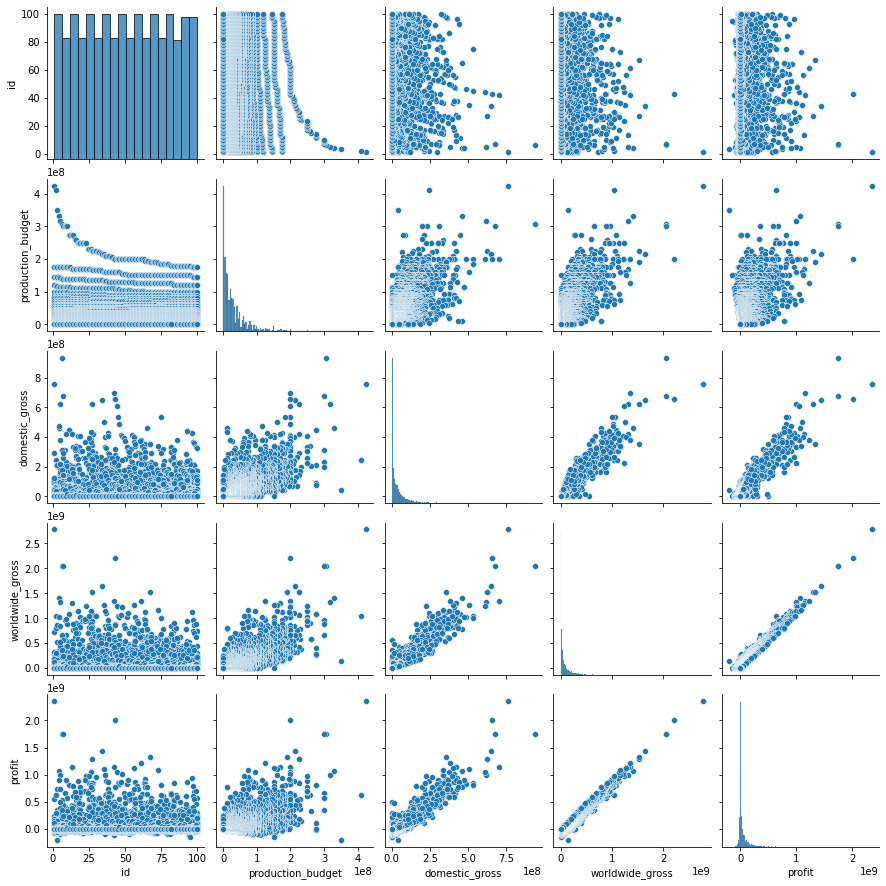

In [18]:
sns.pairplot(movie_budgets)

Looks like a slight positive correlation bewteen worldwide gross and production budget, and between production budget and profit. There's a definite positive correlation between worldwide gross and profit. Zoomed in graphs below.

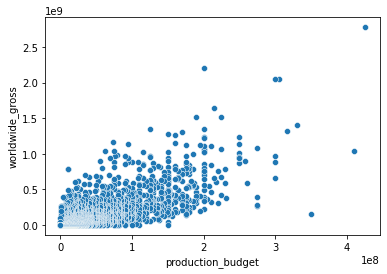

In [19]:
sns.scatterplot(data=movie_budgets, x='production_budget', y='worldwide_gross');

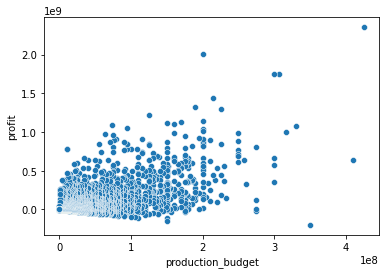

In [20]:
sns.scatterplot(data=movie_budgets, x='production_budget', y='profit');

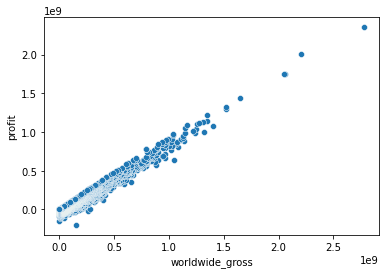

In [21]:
sns.scatterplot(data=movie_budgets, x='worldwide_gross', y='profit');

### Analysis using the Kaggle dataset

After analyzing the given data, we decided to look for a more robust dataset. From here on out, we are using the IMDB dataset from Kaggle, linked here: https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset

In [282]:
imdb_movies = pd.read_csv('imdb_movies.csv')
imdb_movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [287]:
imdb_movies['status'].value_counts()

 Released           10131
 Post Production       31
 In Production         16
Name: status, dtype: int64

Convert date into datetime format.

In [301]:
imdb_movies['date_x'] = pd.to_datetime(imdb_movies['date_x'])

In [302]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10093 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10122 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 954.3+ KB


Drop all movies that are in post production or in production status. We only want to look at released movies. 

In [318]:
imdb_movies.drop(imdb_movies.loc[imdb_movies['status'] != " Released"].index, inplace=True)

In [319]:
imdb_movies['status'].value_counts()

 Released    10131
Name: status, dtype: int64

In [320]:
imdb_movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [245]:
# mega_df = pd.read_sql("""
# SELECT *
# FROM
#     movie_basics
#     INNER JOIN movie_ratings
#     USING(movie_id)    
 
#     INNER JOIN directors
#     USING(movie_id)
    
#     INNER JOIN persons
#     USING(person_id)
# ;
# """, conn)

# super_df = pd.concat([mega_df, movie_budgets])

In [225]:
# mega_df = pd.read_sql("""
# SELECT *
# FROM
#    movie_basics
#    INNER JOIN movie_ratings
#    USING(movie_id)    
 
#     INNER JOIN directors
#     USING(movie_id)
    
#     INNER JOIN persons
#     USING(person_id)
# ;
# """, conn).merge(movie_budgets, 
# #                 left_on = 'primary_title',
#                  right_on = 'movie',
#                  how = 'inner').sort_values(by='profit', ascending=False)

In [412]:
# mega_df[mega_df['primary_title'] == 'Avatar'][['primary_title', 'start_year']]

In [413]:
# 1737 rows where profit > 100,000
# mega_df.loc[mega_df['profit'] > 100000].shape

In [414]:
# 1138 rows where profit < 100,000
# mega_df.loc[mega_df['profit'] < 100000].shape

In [415]:
# mega_df['genres'].value_counts()

Let's split up the genres. 

In [383]:
imdb_movies['genre'].value_counts()

Drama                                             556
Comedy                                            372
Drama, Romance                                    268
Horror                                            257
Horror, Thriller                                  199
                                                 ... 
Western, Comedy, Drama                              1
Romance, Animation, Family, Adventure, Fantasy      1
Fantasy, Family, Comedy, Animation                  1
Mystery, Drama, Thriller, Romance, War              1
Adventure, Drama, History, Thriller, War            1
Name: genre, Length: 2294, dtype: int64

In [405]:
genre_list = ['Action','Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War', 'Western', 'TV Movie']

for genre in genre_list:
    imdb_movies[genre] = imdb_movies['genre'].str.contains(genre)

In [406]:
len(genre_list)

19

Drop rows where crew is N/A

In [351]:
imdb_movies.drop(imdb_movies.loc[imdb_movies['crew'].isna()].index, inplace=True)

In [353]:
imdb_movies['crew'].isna().sum()

0

Here's all of Adam Sandler's movies, just in case you were wondering.

In [437]:
# useful if we want to look at a specific crew member
adam_sandler_df = imdb_movies.loc[imdb_movies['crew'].str.contains('Adam Sandler')].head()
adam_sandler_df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,History,Music,Mystery,Drama,War,Biography,Musical,Science Fiction,Western,TV Movie
12,Murder Mystery 2,2023-03-31,65.0,"Comedy, Mystery, Action","After starting their own detective agency, Nic...","Adam Sandler, Nick, Jennifer Aniston, Audrey, ...",Murder Mystery 2,Released,English,43800000.0,...,False,False,True,False,False,False,False,False,False,False
166,Murder Mystery,2019-05-25,63.0,"Comedy, Mystery","On a long-awaited trip to Europe, a New York C...","Adam Sandler, Nick Spitz, Jennifer Aniston, Au...",Murder Mystery,Released,English,24000000.0,...,False,False,True,False,False,False,False,False,False,False
508,Grown Ups 2,2013-09-26,61.0,Comedy,Lenny has relocated his family back to the sma...,"Adam Sandler, Lenny Feder, Kevin James, Eric L...",Grown Ups 2,Released,English,80000000.0,...,False,False,False,False,False,False,False,False,False,False
536,Grown Ups,2010-06-24,64.0,Comedy,After their high school basketball coach passe...,"Adam Sandler, Lenny Feder, Kevin James, Eric L...",Grown Ups,Released,English,75000000.0,...,False,False,False,False,False,False,False,False,False,False
742,Blended,2014-06-11,69.0,"Comedy, Romance",Recently divorced mom Lauren and widowed dad J...,"Adam Sandler, Jim, Drew Barrymore, Lauren, Wen...",Blended,Released,English,45000000.0,...,False,False,False,False,False,False,False,False,False,False


Drop rows where genre is N/A.

In [379]:
imdb_movies.drop(imdb_movies.loc[imdb_movies['genre'].isna()].index, inplace=True)

In [382]:
imdb_movies['genre'].isna().sum()

0

Let's look at some scatterplots to see if there are any obvious correlations. 

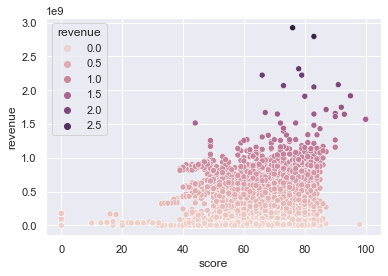

In [361]:
sns.scatterplot(data=imdb_movies, x='score', y='revenue', hue='revenue');

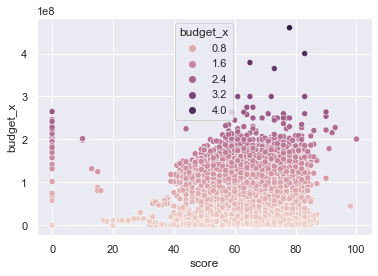

In [439]:
sns.scatterplot(data=imdb_movies, x='score', y='budget_x', hue='budget_x');

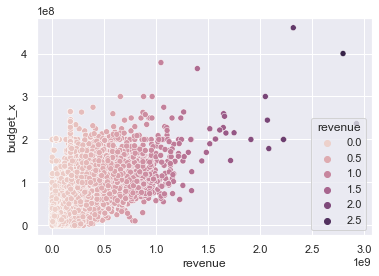

In [442]:
sns.scatterplot(data=imdb_movies, x='revenue', y='budget_x', hue='revenue');

In [35]:
# sns.pairplot(mega_df)

In [274]:
# check for avatar to see if merged df is correct

In [416]:
# movie_basics[movie_basics['primary_title'] == 'Avatar']

In [417]:
# movie_ratings[movie_ratings['movie_id'] == 'tt1775309']

In [418]:
# mega_df.loc[mega_df['original_title'] == 'Abatâ']

In [419]:
# mega_df[mega_df['primary_title'] == 'Titanic'][['production_budget', 'primary_name']]

In [420]:
# mega_df[mega_df['Comedy'] == True]['averagerating'].max()

In [421]:
# mega_df[mega_df['Comedy'] == True]['averagerating'].min()

In [422]:
# mega_df[mega_df['Comedy'] == True]['averagerating'].mean()

In [423]:
# genre_list = ['Action','Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Sport', 'Animation',
#               'Horror', 'Fantasy', 'Romance', 'Sci-Fi', 'Documentary', 'History', 'Music',
#               'Mystery', 'Drama', 'War', 'Biography', 'Musical']

# genre_means = {}

# for genre in genre_list:
#     mean = mega_df[mega_df[genre] == True]['averagerating'].mean()
#     genre_means[genre] = mean
# genre_means       

In [391]:
imdb_movies.loc[imdb_movies['names'] == 'Avatar']

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,Romance,Sci-Fi,Documentary,History,Music,Mystery,Drama,War,Biography,Musical
68,Avatar,2009-12-17,76.0,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar,Released,English,237000000.0,...,False,False,False,False,False,False,False,False,False,False


Some visualizations: 

Let's look at score per genre:

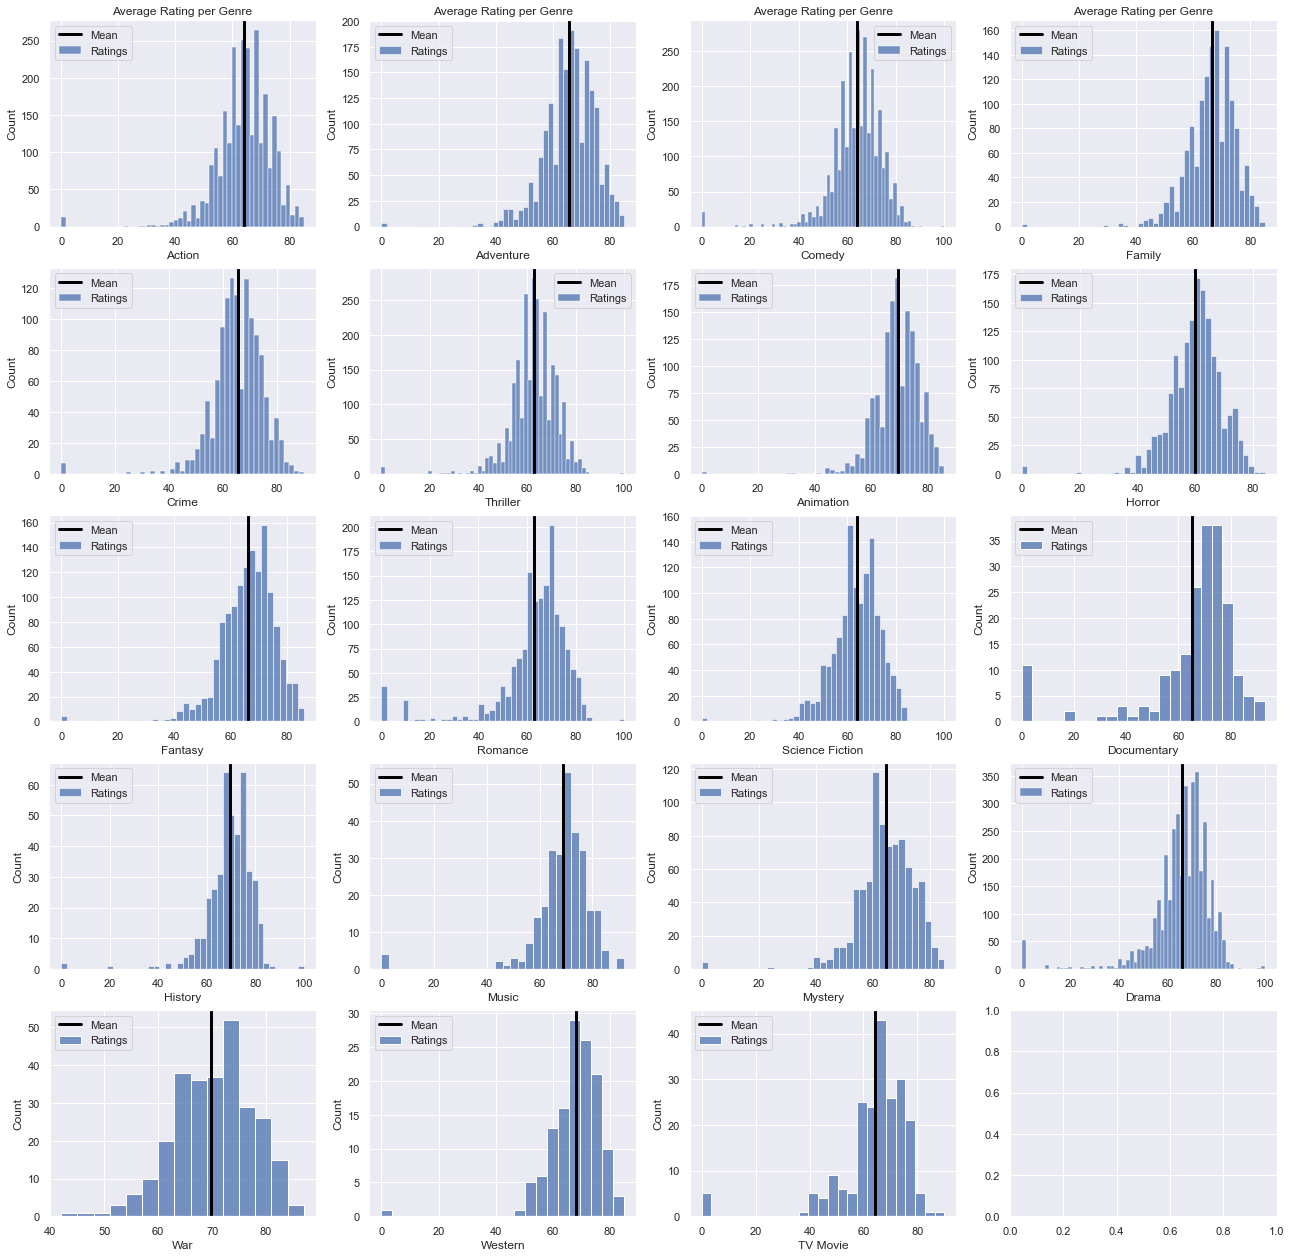

In [407]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', 
              font_scale=1, color_codes=True, rc=None)

fig, axs = plt.subplots(5, 4, figsize=(22, 22))
y = 0
x = 0

for genre in genre_list:
    sns.histplot(imdb_movies[imdb_movies[genre] == True]['score'], ax = axs[math.floor(x),y%4])
    axs[math.floor(x),y%4].set_xlabel(genre)
    axs[math.floor(x),y%4].axvline(x = imdb_movies[imdb_movies[genre] == True]['score'].mean(), color = 'black', lw = 3)
    
    labels = ['Mean', 'Ratings']
    axs[math.floor(x),y%4].legend(labels)
    
    if math.floor(x) == 0:
        axs[math.floor(x),y%4].set_title('Average Rating per Genre')        
    y += 1
    x += .25

And profit per genre:

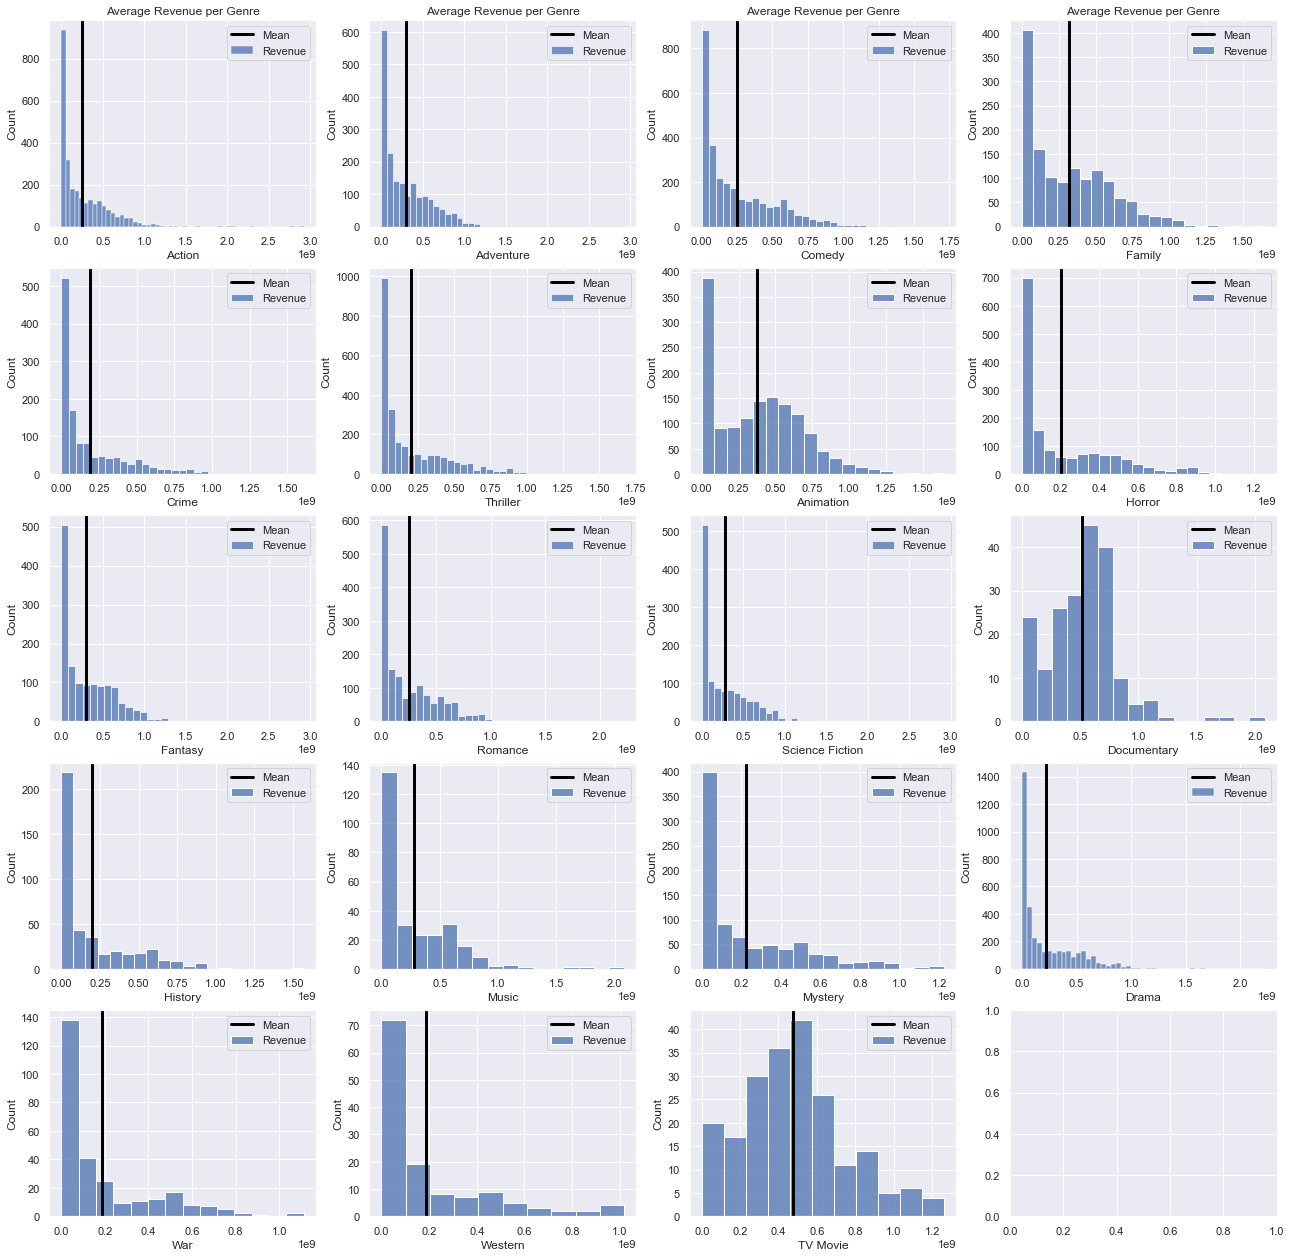

In [408]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', 
              font_scale=1, color_codes=True, rc=None)

fig, axs = plt.subplots(5, 4, figsize=(22, 22))
y = 0
x = 0

for genre in genre_list:
    sns.histplot(imdb_movies[imdb_movies[genre] == True]['revenue'], ax = axs[math.floor(x),y%4])
    axs[math.floor(x),y%4].set_xlabel(genre)
    axs[math.floor(x),y%4].axvline(x = imdb_movies[imdb_movies[genre] == True]['revenue'].mean(), color = 'black', lw = 3)
    
    labels = ['Mean', 'Revenue']
    axs[math.floor(x),y%4].legend(labels)
    
    if math.floor(x) == 0:
        axs[math.floor(x),y%4].set_title('Average Revenue per Genre')        
    y += 1
    x += .25

In [424]:
# sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', 
#               font_scale=1, color_codes=True, rc=None)

# fig, axs = plt.subplots(5, 4, figsize=(22, 22))
# y = 0
# x = 0

# for genre in genre_list:
#     sns.histplot(mega_df[mega_df[genre] == True]['profit'], ax = axs[math.floor(x),y%4])
#     axs[math.floor(x),y%4].set_xlabel(genre)
#     axs[math.floor(x),y%4].set_ylabel('profit')
#     axs[math.floor(x),y%4].axvline(x = mega_df[mega_df[genre] == True]['profit'].mean(), color = 'black', lw = 3)
    
#     labels = ['Mean', 'Profit']
#     axs[math.floor(x),y%4].legend(labels)
    
#     if math.floor(x) == 0:
#         axs[math.floor(x),y%4].set_title('Average Profit per Genre')        
#     y += 1
#     x += .25

In [425]:
# what is the percentage profit?
# mega_df['percentage_profit'] = mega_df['profit'] / mega_df['production_budget']

In [426]:
# mega_df.loc[mega_df['percentage_profit'] == mega_df['percentage_profit'].max()]

In [427]:
# mega_df.loc[mega_df['percentage_profit'] == mega_df['percentage_profit'].min()]

<Figure size 1008x720 with 0 Axes>

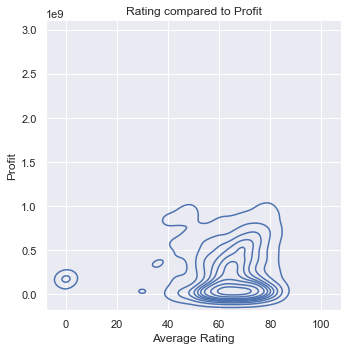

In [429]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

plt.figure(figsize = (14, 10))
sns.displot(data=imdb_movies, x='score', y='revenue', kind='kde')
plt.xlabel('Average Rating')
plt.ylabel('Profit')
plt.title('Rating compared to Profit')
plt.grid(True)
plt.show();

In [430]:
# mega_df.loc[mega_df['profit'] == mega_df['profit'].max()]

In [431]:
# mega_df.loc[mega_df['profit'] == mega_df['profit'].min()]

In [432]:
# mega_df.loc[mega_df['percentage_profit'] > 100][['original_title', 'production_budget', 'worldwide_gross']]

In [433]:
# mega_df.loc[mega_df['percentage_profit'] < 50][['original_title', 'production_budget', 'worldwide_gross']]

In [434]:
# mega_df[mega_df['original_title'] == 'Titanic'][['original_title', 'production_budget', 'worldwide_gross', 'profit', 'percentage_profit']]

In [435]:
# mega_df.loc[mega_df['profit'] > 100000][['original_title', 'production_budget', 'worldwide_gross', 'percentage_profit']]